# Exercise 02

In [96]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
PI2 = 2 * np.pi

In [98]:
# suppress scientific notation for small numbers
np.set_printoptions(precision=3, suppress=True)

(1) 生成複合訊號

In [99]:
def synthesize2(amps, freqs, ts):
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    ys = np.dot(M, amps)
    return ys

In [100]:
amps = np.array([0.5, 0.5, 0.5, 0.5])
freqs = np.array([261,329,391,523])
framerate = 16384
ts = np.linspace(0, 1, framerate, endpoint=False)
ys = synthesize2(amps, freqs, ts)
print(ys)
print(len(ys))

[2.   +0.j    1.978+0.287j 1.912+0.567j ... 1.805-0.833j 1.912-0.567j
 1.978-0.287j]
16384


In [101]:
from thinkdsp import Wave

wave = Wave(ys, framerate)
wave.apodize()
wave.make_audio()

(2) DFT實作

In [102]:
def dft2(ys,k,N):
  res = 0
  for n in range(N):
    res += ys[n]*np.exp(-2*np.pi*1j*n*k/N)
  return res

[(-0.26706550802703877+0.01844729796598157j), (-0.24759459858563543+0.017017196160982597j), (-0.23154711797433442+0.015685893915070605j), (-0.22075728425109406+0.01459053677042291j), (-0.21656165848327918+0.013845846890898388j), (-0.21965862553436982+0.013532693886915456j), (-0.2300295469451884+0.01368993269651507j), (-0.24693034360380778+0.014310331377223259j), (-0.26895537368763095+0.01534101418042059j), (-0.2941682916755873+0.016688403004095624j)]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


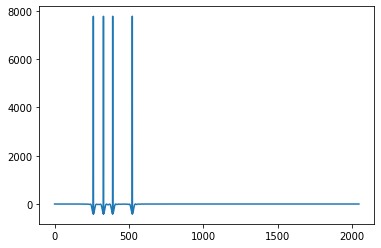

In [103]:
N = framerate
amps = [dft2(wave.ys,k,N) for k in range(N)]
print(amps[:10])
plt.plot(ts[:len(ts)//8]*framerate,amps[:len(amps)//8])

上面這段code跑超久= =，可以去泡杯咖啡。

(3) FFT實作

In [104]:
def fft(ys,k,N):
  # if len(ys)<=10:
  #   return dft2(ys,k,N)
  if len(ys)==1:
    return ys[0]
  ys_odd = ys[::2]
  ys_even = ys[1::2]

  k_half = k
  if k>=N//2:
    k_half = k-N//2
  
  return fft(ys_even,k_half,N//2) + np.exp(-2*np.pi*1j*k/N)*fft(ys_odd,k_half,N//2)

16384


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


[-0.267+0.j    -0.268-0.001j -0.27 -0.003j -0.273-0.004j -0.276-0.004j
 -0.281-0.004j -0.285-0.004j -0.29 -0.003j -0.294-0.002j -0.297-0.001j]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


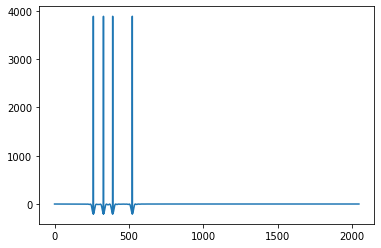

In [105]:
N = framerate
# amps = [fft(wave.ys,k,N) for k in range(N)]
print(len(wave.ys))
amps = FFT(wave.ys)
print(amps[:10])
plt.plot(ts[:len(ts)//8]*framerate,amps[:len(amps)//8])

以上為自行實作之FFT，依照課本理論公式計算得出，可以看到，與np.fft大致相同。也與dft相同。

In [106]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    # print(x.shape)
    
    if N <= 1:  # this cutoff should be optimized
        return x[0]

    elif N % 2 > 0:
        raise ValueError("size of x must be a power of 2")

    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])

16384


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


[-0.267+0.j    -0.268-0.001j -0.27 -0.003j -0.273-0.004j -0.276-0.004j
 -0.281-0.004j -0.285-0.004j -0.29 -0.003j -0.294-0.002j -0.297-0.001j]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


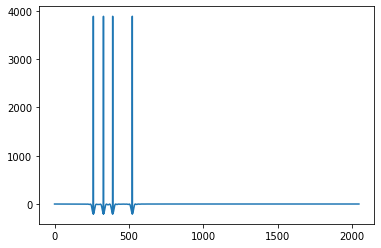

In [107]:
N = framerate
# amps = [fft(wave.ys,k,N) for k in range(N)]
print(len(wave.ys))
amps = FFT(wave.ys)
print(amps[:10])
plt.plot(ts[:len(ts)//8]*framerate,amps[:len(amps)//8])

以上為參考網路教學對於FFT的實作，與np.fft大致。與我自行依造公式撰寫的也相同。

[-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.+0.j -0.-0.j -0.-0.j  0.-0.j -0.-0.j
  0.-0.j]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


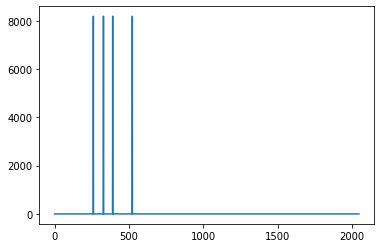

In [108]:
amps = np.fft.fft(ys)
print(amps[:10])
plt.plot(ts[:len(ts)//8]*framerate,amps[:len(amps)//8])

最後是np.fft的結果，與dft的計算結果都相同。